In [47]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [48]:
filenames = os.listdir('/kaggle/input/cifar-10-competition-dataset/train/train')
type(filenames)

list

In [49]:
len(filenames)

50000

In [5]:
print(filenames[:5])

['27147.png', '32352.png', '41695.png', '21130.png', '36145.png']


In [6]:
print(filenames[-5:])

['48768.png', '37246.png', '23121.png', '36054.png', '4164.png']


In [7]:
Train = '/kaggle/input/cifar-10-competition-dataset/train'
Train_Label = '/kaggle/input/cifar-10-competition-dataset/trainLabels.csv'
Test = '/kaggle/input/cifar-10-competition-dataset/test'

In [8]:
train_label = pd.read_csv(Train_Label)

In [9]:
train_label.head(5)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [10]:
train_label.tail(5)

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [11]:
train_label[train_label['id'] == 5]

,id,label
4,5,automobile


In [12]:
len(train_label)

50000

In [13]:
train_label['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [14]:
labels_dictionary = {'airplane': 0 , 'automobile': 1 , 'bird': 2 , 'cat': 3 , 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}

**Here Lebels array is created or train_Y, Here labels, such as, airplane/automobiles are converted to endcoded value**

In [15]:
label = [labels_dictionary[i] for i in train_label['label']] #Encoded label array

In [16]:
print(label[:5])
print(label[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [17]:
import cv2
from google.colab.patches import cv2_imshow

In [18]:
img = cv2.imread('/kaggle/input/cifar-10-competition-dataset/train/train/1.png')

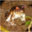

In [23]:
cv2_imshow(img)

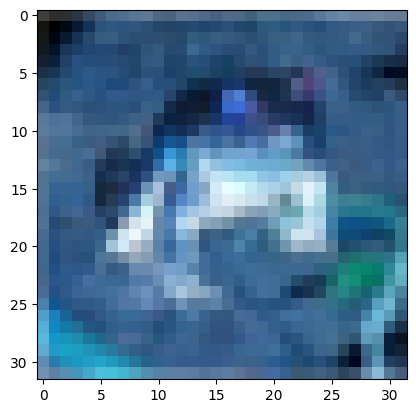

In [24]:
plt.imshow(img)

**Printing first 5data to visualize**

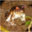

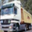

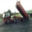

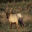

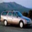

In [25]:
train_image_path = '/kaggle/input/cifar-10-competition-dataset/train/train/'

for i in train_label['id']:
    temp = cv2.imread(train_image_path + str(i) + '.png')
    cv2_imshow(temp)

    if i >= 5:
        break

**image_features are created here**

In [26]:
train_image_path = '/kaggle/input/cifar-10-competition-dataset/train/train/'
img_data = [] #Empty array

for i in train_label['id']:
    temp = cv2.imread(train_image_path + str(i) + '.png')
    img_data.append(temp)

In [27]:
type(img_data)

list

In [28]:
len(img_data)

50000

In [29]:
type(img_data[0])

numpy.ndarray

In [35]:
for i in range(5):
    print(img_data[i].shape)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


In [36]:
X = np.array(img_data)
Y = np.array(label)

In [39]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Normalizing the feature values from 0 to 1**

In [42]:
X = X/255

**Splitting train and test data**

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 2)

**Building the neural network**

In [52]:
import tensorflow as tf
from tensorflow import keras

*The neural network is created*

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32 , 32 , 3)), #input layer
    keras.layers.Dense(64 , activation = 'relu'), #hidden layer
    keras.layers.Dense(10 , activation = 'softmax'), #output layer
])

*Parameters of the neural network*

In [62]:
model.compile(
    optimizer = 'adam', #the other optimizers are
    loss = 'sparse_categorical_crossentropy', #as labels are encoded so sparse is used
    metrics = ['acc']
)

*Feeding the data to the neural network*

In [65]:
model.fit(X_train , Y_train , validation_split = 0.1 , epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2714 - loss: 1.9197 - val_acc: 0.2600 - val_loss: 1.9437
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.2667 - loss: 1.9236 - val_acc: 0.2665 - val_loss: 1.9111
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.2692 - loss: 1.9257 - val_acc: 0.2587 - val_loss: 1.9098
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.2668 - loss: 1.9187 - val_acc: 0.2473 - val_loss: 1.9525
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.2649 - loss: 1.9236 - val_acc: 0.2685 - val_loss: 1.9138
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.2673 - loss: 1.9169 - val_acc: 0.2637 - val_loss: 1.9152
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.2683 - loss: 1.9162 - val_acc: 0.2615 - val_loss: 1.9205
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.2658 - loss: 1.9183 - val_acc: 0.2685 - val_loss: 1.9147
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

In [66]:
model.fit(X_train , Y_train , validation_split = 0.1 , batch_size = 10 , epochs = 10)

Epoch 1/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.2647 - loss: 1.9284 - val_acc: 0.2725 - val_loss: 1.9121
Epoch 2/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.2661 - loss: 1.9244 - val_acc: 0.2660 - val_loss: 1.9143
Epoch 3/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.2676 - loss: 1.9178 - val_acc: 0.2585 - val_loss: 1.9323
Epoch 4/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.2622 - loss: 1.9324 - val_acc: 0.2545 - val_loss: 1.9452
Epoch 5/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.2671 - loss: 1.9250 - val_acc: 0.2705 - val_loss: 1.9159
Epoch 6/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.2656 - loss: 1.9196 - val_acc: 0.2600 - val_loss: 1.9276
Epoch 7/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.2646 - loss: 1.9188 - val_acc: 0.2635 - val_loss: 1.9153
Epoch 8/10
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.2673 - loss: 1.9206 - val_acc: 0.2560 - val_loss: 1.9395
Epoch 9/10
3600/3600 ━━━━━━━━━━━━━━━━━━━